## Assignment-2

1 A) Using the rnorm() function, create a vector, “x”, containing 100 observations drawn from a N(0,1) distribution. This represents a feature, X.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ISLP import load_data  
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

In [ ]:
np.random.seed(1)
x = np.random.normal(0, 1, 100)
eps = np.random.normal(0, 0.5, 100)  # note: sd = sqrt(0.25) = 0.5
beta0 = 2
beta1 = 3
y = beta0 + beta1 * x + eps

1 B) Using the rnorm() function, create a vector, “eps”, containing 100 observations drawn from a N(0,0.25) distribution

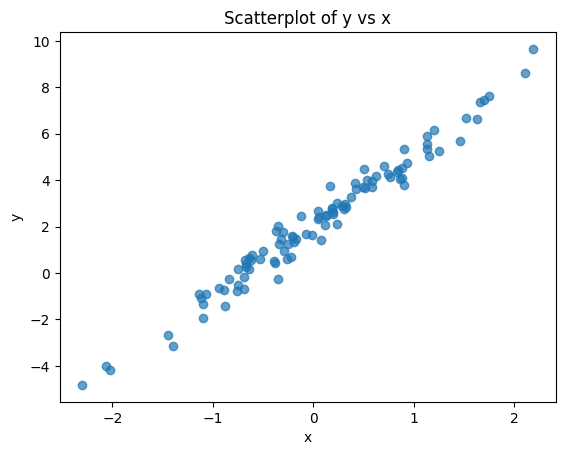

In [4]:
plt.scatter(x, y, alpha=0.7)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatterplot of y vs x')
plt.show()


## Observation: 
The plot should show a clear linear relationship: as x increases, y increases, centered around the line 
y=2+3x, with some noise from eps.

1C) Using “x” and “eps”, generate a vector “y” according to the model

What is the length of the vector “y” ? What are the values of β0 and β1 in this linear model ?


In [6]:

df = pd.DataFrame({'y': y, 'x': x})
X = sm.add_constant(df['x'])  # adds intercept
model = sm.OLS(df['y'], X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     3312.
Date:                Fri, 15 Aug 2025   Prob (F-statistic):           2.40e-77
Time:                        08:26:13   Log-Likelihood:                -65.124
No. Observations:                 100   AIC:                             134.2
Df Residuals:                      98   BIC:                             139.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0735      0.047     44.128      0.0

## Comparison:

𝛽^0β^0 should be close to the true 2, <br>
𝛽^1β^1 should be close to the true 3   <br>
Deviations arise due to sampling noise.

1D) Create a scatterplot displaying the relationship between “x” and “y”. Comment on what you observe.


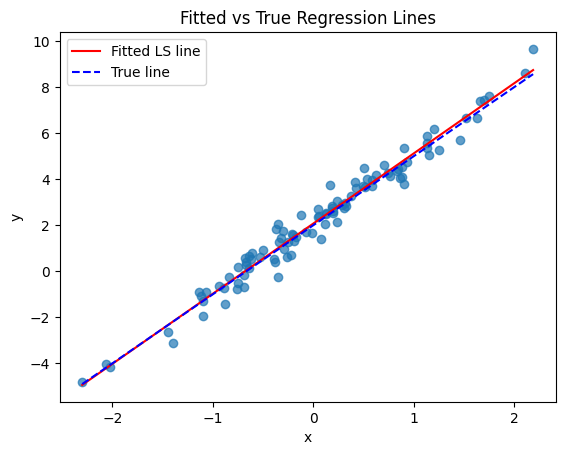

In [7]:
plt.scatter(x, y, alpha=0.7)
x_line = np.linspace(min(x), max(x), 100)
y_hat = model.params['const'] + model.params['x'] * x_line
plt.plot(x_line, y_hat, color='red', label='Fitted LS line')
y_true = beta0 + beta1 * x_line
plt.plot(x_line, y_true, color='blue', linestyle='--', label='True line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Fitted vs True Regression Lines')
plt.show()


## Observation:
The plot helps visualize how close the estimated regression line is to the true underlying line.

1E) Fit a least squares linear model to predict “y” using “x”. Comment on the model obtained. How do β^0 and β^1 compare to β0 and β1 ?

In [9]:
np.random.seed(1)
x = np.random.normal(0, 1, 100)
eps = np.random.normal(0, 0.5, 100)  
beta0 = 2
beta1 = 3
y = beta0 + beta1 * x + eps
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
print("True β0:", beta0, " | Estimated β̂0:", round(model.params[0], 4))
print("True β1:", beta1, " | Estimated β̂1:", round(model.params[1], 4))
print("\nModel Summary:")
print(model.summary())

True β0: 2  | Estimated β̂0: 2.0735
True β1: 3  | Estimated β̂1: 3.0477

Model Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     3312.
Date:                Fri, 15 Aug 2025   Prob (F-statistic):           2.40e-77
Time:                        08:36:56   Log-Likelihood:                -65.124
No. Observations:                 100   AIC:                             134.2
Df Residuals:                      98   BIC:                             139.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

## Observation:
R² is very high (close to 0.97), meaning the model explains most of the variation in  y.

p-values for both coefficients are essentially zero, indicating a statistically significant relationship between  x and 𝑦.

1F) Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. Use the legend() function to create an appropriate legend.

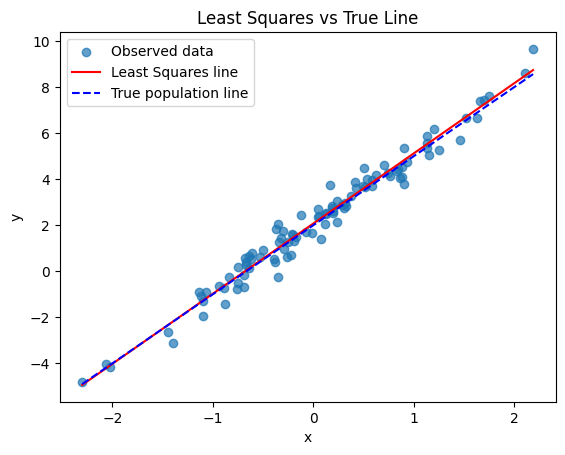

In [10]:
beta0 = 2
beta1 = 3
y = beta0 + beta1 * x + eps

X = sm.add_constant(x)
model = sm.OLS(y, X).fit()

x_line = np.linspace(min(x), max(x), 100)
y_hat = model.params[0] + model.params[1] * x_line
y_true = beta0 + beta1 * x_line
plt.scatter(x, y, alpha=0.7, label='Observed data')
plt.plot(x_line, y_hat, color='red', label='Least Squares line')
plt.plot(x_line, y_true, color='blue', linestyle='--', label='True population line')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Least Squares vs True Line')
plt.legend()
plt.show()


## Observation
coefficients 𝛽0 and β1 are very close to the true 𝛽0=2 and 𝛽1=3. This visual agreement confirms the accuracy and unbiasedness of the least squares estimator under the classical regression assumptions.

## Quesion-2
 This problem involves the “Boston” data set, which we saw in the lab for this chapter. We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors.


In [13]:
Boston = load_data('Boston')
df = Boston.copy()
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


2A) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response ? Create some plots to back up your assertions.


In [14]:
# simple regressions 
predictors = [col for col in df.columns if col != 'crim']
results = {}
for pred in predictors:
    X = sm.add_constant(df[pred])
    model = sm.OLS(df['crim'], X).fit()
    results[pred] = model


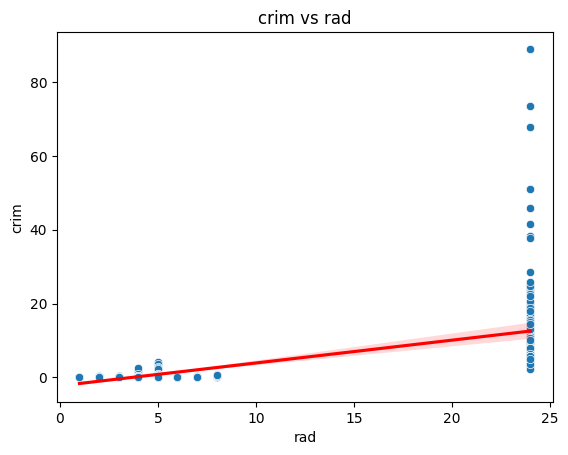

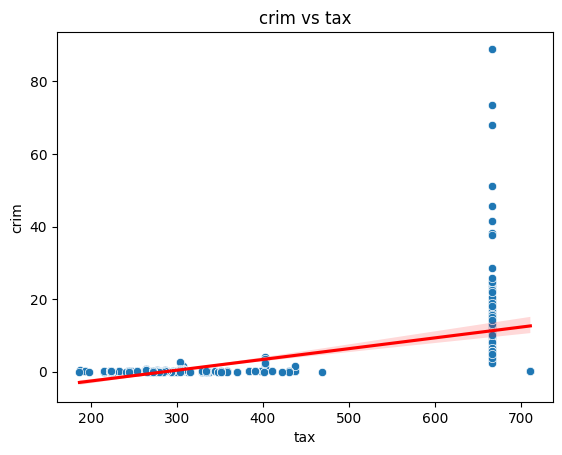

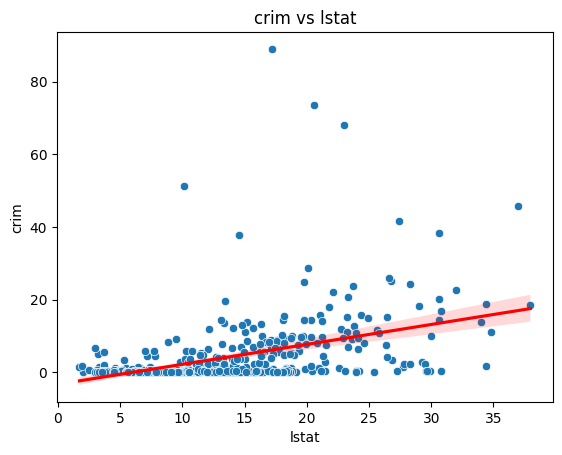

In [15]:
# plots for each predictorrs
for pred in ['rad', 'tax', 'lstat']:
    sns.scatterplot(x=df[pred], y=df['crim'])
    sns.regplot(x=df[pred], y=df['crim'], scatter=False, color='red')
    plt.title(f'crim vs {pred}')
    plt.show()


## Observationn

In the simple linear regression of crim on rad, there is a clear positive relationship: suburbs with higher accessibility to radial highways tend to have higher per capita crime rates. The plot shows that many suburbs have low rad values with low crime, while a cluster at rad = 24 exhibits very high and variable crime rates. This suggests that rad is a statistically significant predictor of crim, and areas with greater highway access may be more prone to higher crime levels.

2B) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0:βj=0 ?

In [16]:
X = sm.add_constant(df[predictors])
full_model = sm.OLS(df['crim'], X).fit()
print(full_model.summary())


                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     33.52
Date:                Fri, 15 Aug 2025   Prob (F-statistic):           2.03e-56
Time:                        08:52:58   Log-Likelihood:                -1655.4
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     493   BIC:                             3392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7784      7.082      1.946      0.0

### Observation

The multiple linear regression model explains approximately **44.9%** of the variation in the per capita crime rate (`R² = 0.449`).  
The overall F-statistic is highly significant (**p < 0.001**), indicating that the predictors collectively have a statistically significant relationship with `crim`.  

At the 5% significance level, the variables showing statistically significant associations with `crim` are:

- **zn** – positive association (p = 0.015)  
- **chas** – negative association (p = 0.002)  
- **dis** – negative association (p < 0.001)  
- **rad** – positive association (p < 0.001)  

Other predictors, such as `nox`, `rm`, `age`, `tax`, `ptratio`, and `indus`, are not statistically significant in the presence of the other variables.  
This suggests that `zn`, `chas`, `dis`, and `rad` are the most influential predictors of crime rate in this dataset when considering all variables together.
